Saving lena_color_256.tif to lena_color_256.tif
1. Convert using mean of RGB channels
2. Convert using weighted RGB channels (weights must sum to 1)
Enter your choice (1 or 2): 1


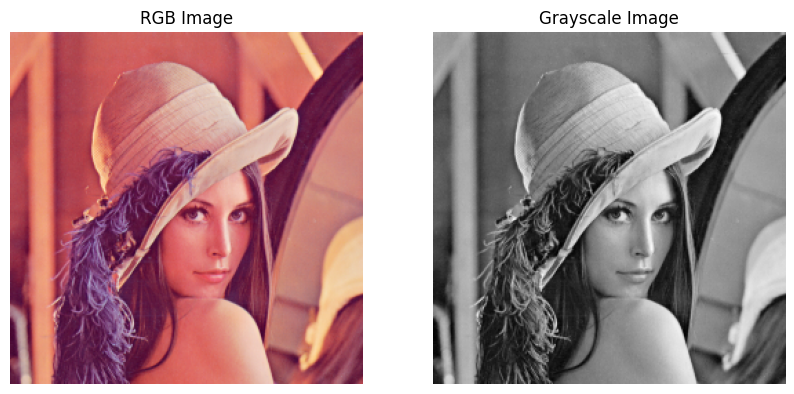

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
import io

uploaded = files.upload()
for filename in uploaded.keys():
    img = Image.open(io.BytesIO(uploaded[filename])).convert("RGB")

print("1. Convert using mean of RGB channels")
print("2. Convert using weighted RGB channels (weights must sum to 1)")
choice = int(input("Enter your choice (1 or 2): "))

width, height = img.size
pixels = img.load()
gray_img = Image.new('L', (width, height))

if choice == 1:
    for y in range(height):
        for x in range(width):
            r, g, b = pixels[x, y]
            gray = (r + g + b) // 3
            gray_img.putpixel((x, y), gray)

elif choice == 2:
    wr = float(input("Enter weight for R (0–1): "))
    wg = float(input("Enter weight for G (0–1): "))
    wb = float(input("Enter weight for B (0–1): "))
    if round(wr + wg + wb, 2) != 1.0:
        print("Error: Weights must sum to 1.")
    else:
        for y in range(height):
            for x in range(width):
                r, g, b = pixels[x, y]
                gray = int(wr*r + wg*g + wb*b)
                gray_img.putpixel((x, y), gray)
else:
    print("Invalid choice.")

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("RGB Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(gray_img, cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')
plt.show()
